In [1]:
#Impotring Modules
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
train_df = pd.read_csv('/home/james/anaconda3/DATA/kaggle/mnist/train.csv')

In [73]:
train_labels = train_df['label'].values

In [20]:
train_data = train_df.drop('label', axis=1).as_matrix()

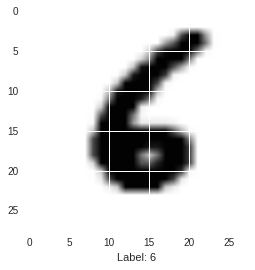

In [74]:
#Testing the format of data.
plt.imshow(train_data[2430].reshape((28,28)))
plt.xlabel('Label: ' + str(train_labels[2430]))
    

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
clf = RandomForestClassifier(n_estimators=100)

In [75]:
clf.fit(train_data,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
clf.predict(train_data[0].reshape(1,-1))

array([1])

In [77]:
test_df = pd.read_csv('/home/james/anaconda3/DATA/kaggle/mnist/test.csv')

In [79]:
test_data = test_df.as_matrix()

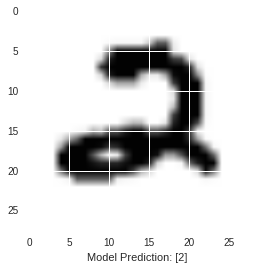

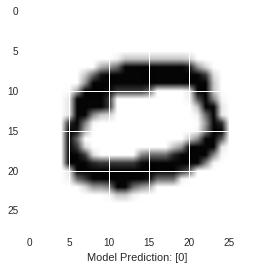

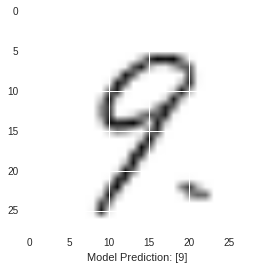

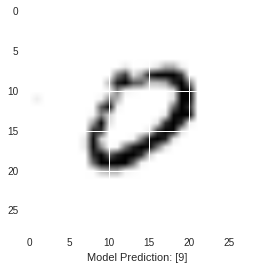

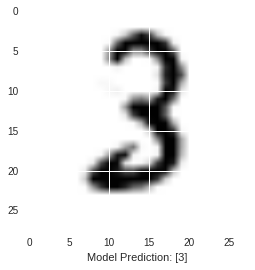

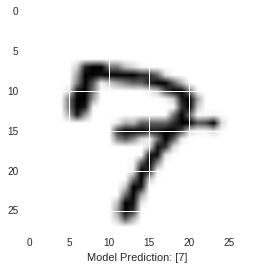

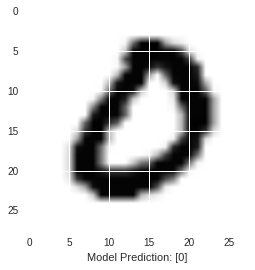

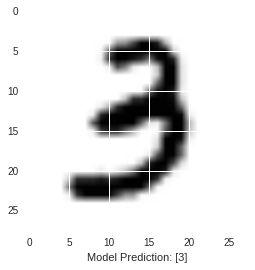

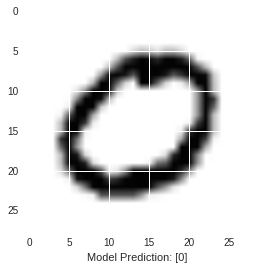

In [81]:
#Checking how the model works on first 10 test digits.
for k in range(9):
    plt.figure()
    plt.imshow(test_data[k].reshape((28,28)))
    plt.xlabel('Model Prediction: ' + str(clf.predict(test_data[k].reshape(1,-1))))

In [86]:
results = []
for k in range(len(test_data)):
    results.append(clf.predict(test_data[k].reshape(1,-1))[0])

In [91]:
results_df = pd.DataFrame(data={'ImageId':pd.Series(data=list(range(1,28001))),'Label':pd.Series(data=results)})

In [94]:
results_df.to_csv('/home/james/anaconda3/DATA/kaggle/mnist/results.csv', index=False)